In [1]:
!conda info --envs

# conda environments:
#
base                     C:\Users\user\anaconda3
MachineLearningEnv    *  C:\Users\user\anaconda3\envs\MachineLearningEnv



# 機器學習與等高線圖

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

from MachineLearning import ModelSetUp
from ContourPlot import Graph
from DataSplit import TrainValidation

from tqdm import tqdm
X, y = make_classification(n_samples=5000, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
TV = TrainValidation(X, y)
X_tr, y_tr, X_ts, y_ts = TV.Data()

In [3]:
Names, models = ['RandomForest', 'LogisticRegression', 'DecisionTree',
                 'GradientBoostingDecisionTree',
                 'SupportVectorMachine'], list()
with tqdm(total = len(Names), desc = 'Model Training', leave = False) as pbar:
    for i in range(len(Names)):
        models.append(ModelSetUp(Names[i], X_tr, y_tr))
        pbar.update()

RandomForest
Accuracy:1.0


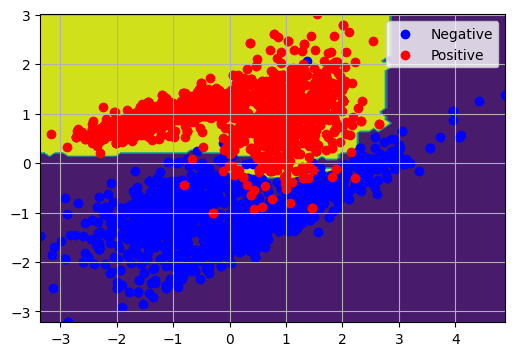

LogisticRegression
Accuracy:0.9519807923169268


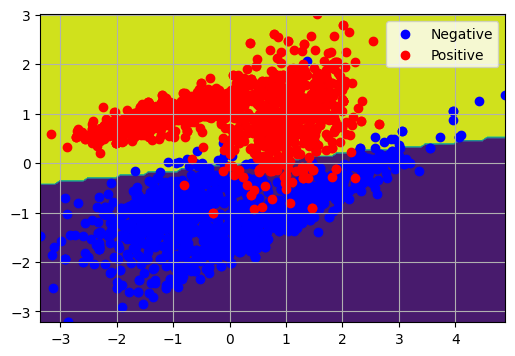

DecisionTree
Accuracy:1.0


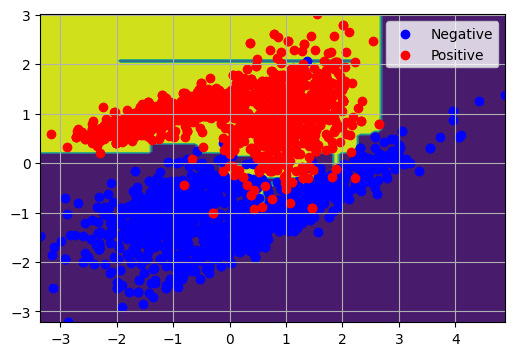

GradientBoostingDecisionTree
Accuracy:1.0


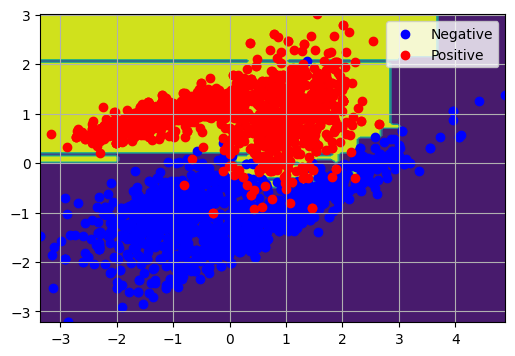

SupportVectorMachine
Accuracy:0.976390556222489


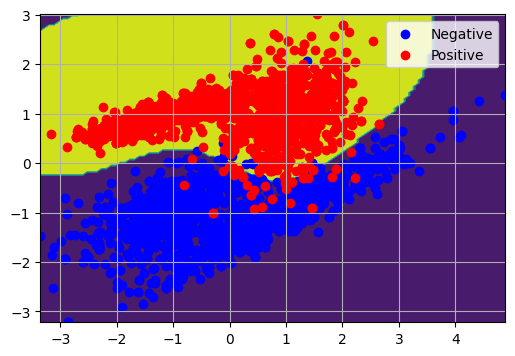

In [4]:
for idx, model in enumerate(models):
    print(Names[idx])
    print('Accuracy:{}'.format(model.model.score(X_tr, y_tr)))
    Graph(model, X_tr, y_tr).plot(100)

RandomForest
Accuracy:0.9759631215014817


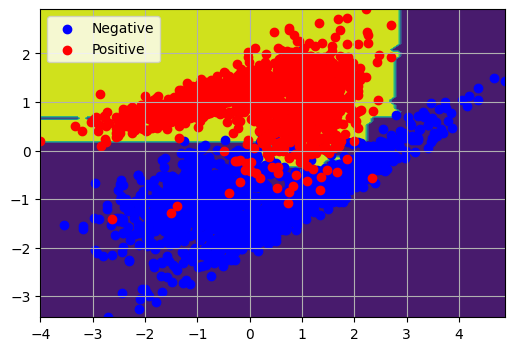

LogisticRegression
Accuracy:0.9565360553177478


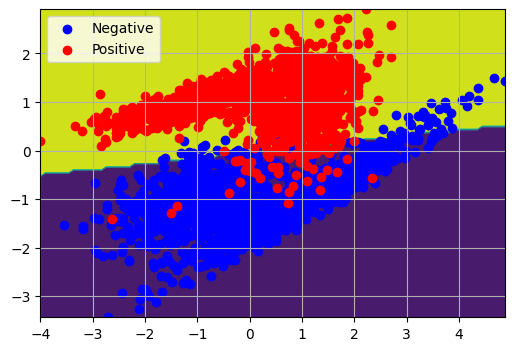

DecisionTree
Accuracy:0.9631215014817254


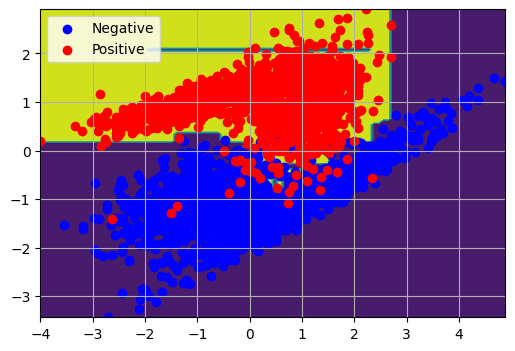

GradientBoostingDecisionTree
Accuracy:0.9733289430358907


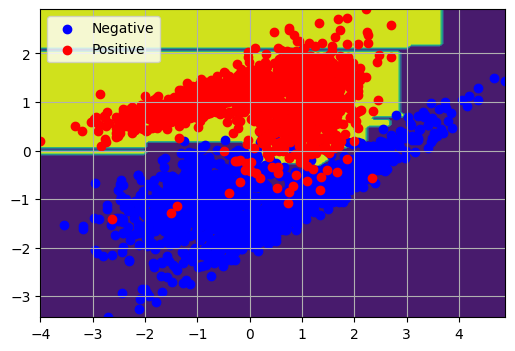

SupportVectorMachine
Accuracy:0.9799143891998683


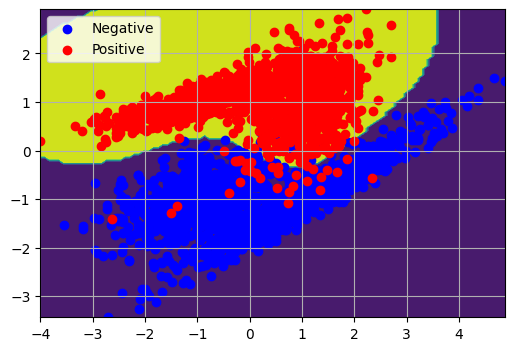

In [5]:
for idx, model in enumerate(models):
    print(Names[idx])
    print('Accuracy:{}'.format(model.model.score(X_ts, y_ts)))
    Graph(model, X_ts, y_ts).plot(100)
    

# 時間序列樣態偵測

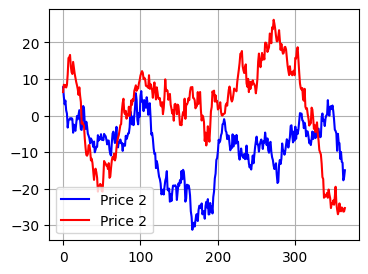

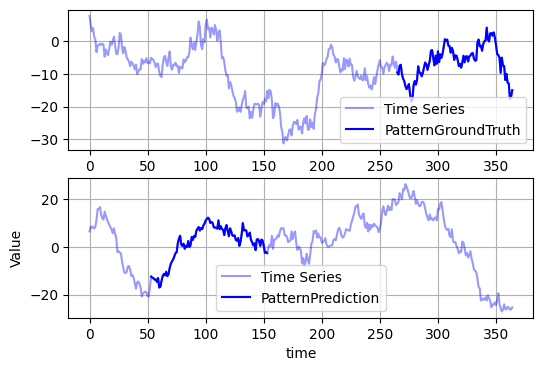

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SeriesPatternRecognition import PatternRecognition
dX = (0.02*5.0*1/365 + 0.4*5.0*np.random.normal(0, 1, size = (365, 1)))
Series1 = 5.0 + np.cumsum(dX)
dX = (0.02*5.0*1/365 + 0.4*5.0*np.random.normal(0, 1, size = (365, 1)))
Series2 = 5.0 + np.cumsum(dX)

plt.figure(figsize = (4, 3))
plt.plot(Series1, color = 'blue', label = 'Price 2')
plt.plot(Series2, color = 'red', label = 'Price 2')
plt.grid()
plt.legend()
plt.show()
model = PatternRecognition(Series1, Series1.shape[0]-100, Series1.shape[0])
model.recognize(Series2, 10)

# 隱藏式馬可夫過程

In [2]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from HiddenMarkovModel import HiddenMarkovModel as hmm
from tqdm import tqdm
dX = (0.02*5.0*1/1000 + 0.4*5.0*np.random.normal(0, 1, size = (1000, 1)))
St = (5.0 + np.cumsum(dX)).reshape(-1, 1)
model = hmm(St, 3)
hidden_states = model.state(St)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


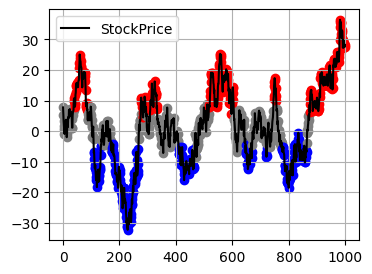

In [3]:
colors = ['red', 'blue', 'gray', 'green', 'orange']
plt.figure(figsize = (4, 3))
plt.plot(St, color = 'black', label = 'StockPrice')
with tqdm(total = 1000, desc = 'HMM', leave = False) as pbar:
    for idx, state in enumerate(hidden_states):
        plt.scatter(idx, St[idx], color = colors[state])
        pbar.update()
plt.legend()
plt.grid()
plt.show()

# HMM + DTW

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


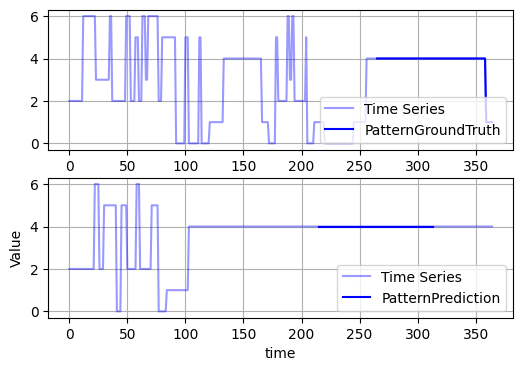

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SeriesPatternRecognition import PatternRecognition
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from HiddenMarkovModel import HiddenMarkovModel as hmm
dX = (0.02*5.0*1/365 + 0.4*5.0*np.random.normal(0, 1, size = (365, 1)))
Series1 = 5.0 + np.cumsum(dX)
dX = (0.02*5.0*1/365 + 0.4*5.0*np.random.normal(0, 1, size = (365, 1)))
Series2 = 5.0 + np.cumsum(dX)

model = hmm(Series1.reshape(-1, 1), 7)
hidden_states1 = model.state(Series1.reshape(-1, 1))
hidden_states2 = model.state(Series2.reshape(-1, 1))
model = PatternRecognition(hidden_states1, hidden_states1.shape[0]-100, hidden_states1.shape[0])
model.recognize(hidden_states2, 10)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


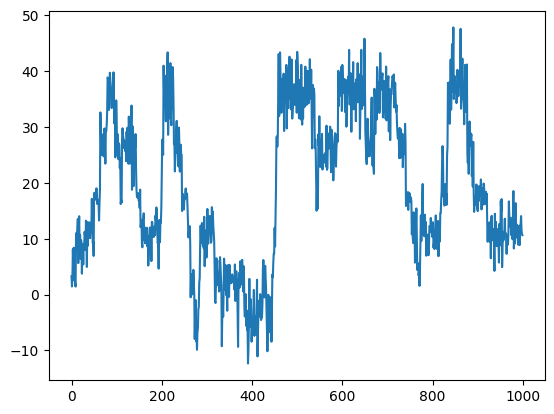

In [18]:
Model = hmm(Series1.reshape(-1, 1), 7)
plt.plot(Model.model.sample(1000)[0])

In [26]:
Model.model.means_ .shape

(7, 1)

# 傳統DTW和HMM + DTW之兩者比較

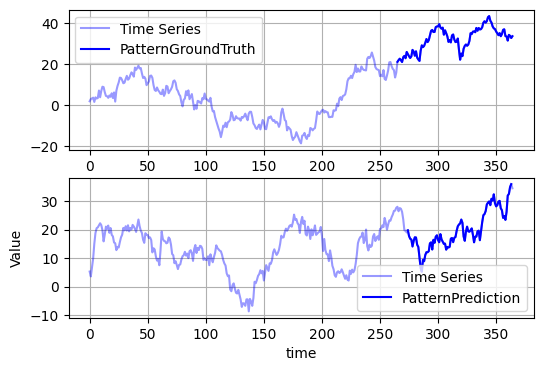

In [2]:
plt.figure(figsize = (6, 4))
## First Part
plt.subplot(2, 1, 1)
plt.plot(Series1, label = 'Time Series', alpha = 0.4, color = 'blue')
IDX = [i for i in range(model.start, model.end)]
plt.plot(IDX, Series1[model.start: model.end], label = 'PatternGroundTruth',
         color = 'blue')
plt.legend()
plt.grid()
## Second Part
plt.subplot(2, 1, 2)
plt.plot(Series2, label = 'Time Series', alpha = 0.4, color = 'blue')
IDX = [i for i in range(model.Result[0][0], model.Result[0][1])]
plt.plot(IDX, Series2[model.Result[0][0]: model.Result[0][1]], label = 'PatternPrediction',
         color = 'blue')
plt.xlabel('time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

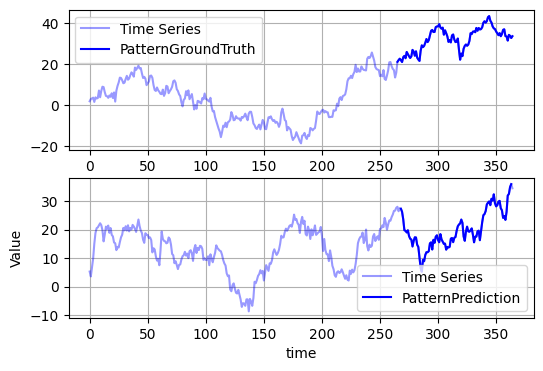

In [3]:
model = PatternRecognition(Series1, Series1.shape[0]-100, Series1.shape[0])
model.recognize(Series2, 10)